##**David Alejandro Vásquez Franco**

##**CC 1000921301**

<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_07_nn_zeroV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [8]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

In [9]:
data_train= "train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [10]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [11]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


In [12]:
np.shape(xtrain)

(209, 64, 64, 3)

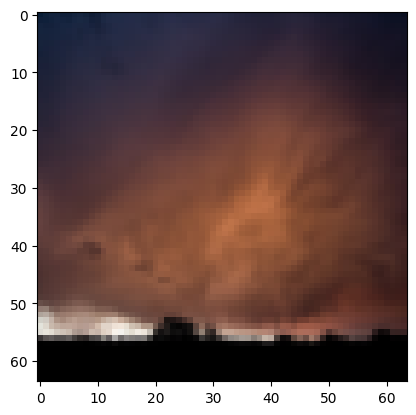

In [13]:
plt.imshow(xtrain[208])

In [14]:
np.shape(xtrain[0])

(64, 64, 3)

In [15]:
np.reshape(xtrain[0], 64*64*3)

array([17, 31, 56, ...,  0,  0,  0], dtype=uint8)

In [16]:

xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [17]:
len(xtrain_[208])

12288

In [18]:
64*64*3

12288

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]}
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ])
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$




## Topología de la red.

1. Construir un clase  que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal :

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

En este caso:
- $n^{[0]}=n_x$ seran los valores de entradas de la capa de entrada
- $n^{[1]}=n_{h1}$ Primera capa oculta de la red neuronal
- $n^{[2]}=n_{h2}$ Segunda capa oculta de la red neuronal

.

.

.


- $n^{[l]}=n_{hl}$ Segunda capa oculta de la red neuronal
.

.

.

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal

donde

- $\mathrm{n_x}$: valores de entrada
- $\mathrm{n_{h1}}$: hidden layer 1
- $\mathrm{n_{h2}}$: hidden layer 2
- $\mathrm{n_y}$: last layer

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal


También definir una lista con las funciones de activaciones para cada capa.


activation=[None, relu, relu, relu, ...,sigmoid]

  


a. Cada unas de las capas deberá tener los parámetros de inicialización de manera aleatoria:


La matriz de parametros para cada capa debera tener:


$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

Lo anteriores parametros deberán estar en el constructor de la clase.


b. Construya un metodo llamado output cuya salida serán los valores de Z y A


$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $.

In [19]:
import numpy as np
class layer_nn():
    def __init__(self, act_fun, nlayer_presente, nlayer_before):
        self.theta = 2*np.random.random((nlayer_presente, nlayer_before))-1
        self.B = 2*np.random.random((nlayer_presente, 1))-1
        self.act_fun = act_fun


In [20]:
def act_funcion(x, activation):
    if activation=="sigmoid":
        f=lambda x: 1/(1+np.exp(-x))
        fp=f(x)*(1-f(x))
        return np.array([f, fp])


In [21]:
layer = layer_nn("sigmoid", 3, 3)

In [22]:
topology = [10, 3, 4, 6, 1]
l1 = layer_nn("sigmoid", 3, 10)
l2 = layer_nn("sigmoid", 4, 3)
l3 = layer_nn("sigmoid", 6, 4)
l4 = layer_nn("sigmoid", 1, 6)


In [23]:
A0 = xtrain_.T

In [ ]:
Z1 = l1.theta.T@A0+l1.B



Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```
    

2. Construir un generalizacion de la red, en el que entrada el valor inicial
y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

  ```
  A, nn = forward_pass(A0, nn_red)

 ```
3. Encontrar la funcion de coste.


$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


4. Construir un codigo que permita realizar el BackwardPropagation


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$


# Generalizacion Forward Pass


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}




# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# **Solución**

In [57]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import requests
import seaborn as sns
from sklearn.metrics import confusion_matrix

train_catvnoncat.h5 descargado.
test_catvnoncat.h5 descargado.
Dimensiones A0: (12288, 209), Y: (1, 209)


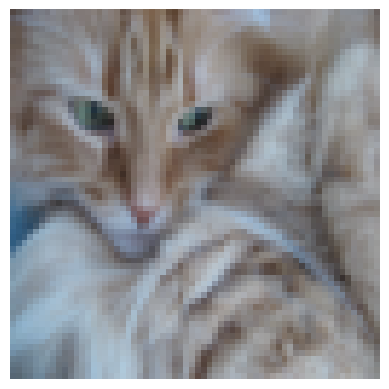

In [58]:
# Descarga
if os.path.exists("train_catvnoncat.h5"): os.remove("train_catvnoncat.h5")
if os.path.exists("test_catvnoncat.h5"): os.remove("test_catvnoncat.h5")

def download(filename, mirrors):
    for url in mirrors:
        try:
            r = requests.get(url, allow_redirects=True)
            # Verificación
            if r.status_code == 200 and r.content[:8] == b'\x89HDF\r\n\x1a\n':
                with open(filename, 'wb') as f:
                    f.write(r.content)
                print(f"{filename} descargado.")
                return
        except:
            continue

# Lista de espejos
mirrors_train = [
    "https://raw.githubusercontent.com/mohamedameen93/Deep-Learning-Specialization-Coursera/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/train_catvnoncat.h5",
    "https://github.com/rvarun7777/Deep_Learning/raw/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/train_catvnoncat.h5"
]
mirrors_test = [
    "https://raw.githubusercontent.com/mohamedameen93/Deep-Learning-Specialization-Coursera/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5",
    "https://github.com/rvarun7777/Deep_Learning/raw/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5"
]

download("train_catvnoncat.h5", mirrors_train)
download("test_catvnoncat.h5", mirrors_test)


# Carga de datos
train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y_orig = np.array(test_dataset["test_set_y"][:])

classes = np.array(test_dataset["list_classes"][:])


# Reshape etiquetas
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

# Aplanar y Normalizar
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.

# Variables finales
A0 = train_x
Y = train_set_y

print(f"Dimensiones A0: {A0.shape}, Y: {Y.shape}")

# Verificación
plt.imshow(train_x_orig[2])
plt.axis('off')
plt.show()

In [59]:
class layer_nn():
  def __init__(self, func_act, nn_present, nn_before):
    self.func_act = func_act
    # Usamos np.random.randn (distribución normal) y multiplicamos por 0.01

    self.theta = np.random.randn(nn_present, nn_before) * 0.01
    self.b = np.zeros((nn_present, 1)) # Los sesgos pueden empezar en 0

    self.Z = None
    self.A = None
    self.dtheta = None
    self.db = None

In [60]:
def activation_function(func_act, Z):
    """
    Calcula la activación de una capa dado Z.
    Retorna:
    f  -> El valor de activación (usado en Forward Pass)
    fp -> La derivada de la función (usada en Backward Pass)
    """
    if func_act == "sigmoid":
        # Fórmula: 1 / (1 + e^-Z)
        f = 1 / (1 + np.exp(-Z))
        fp = f * (1 - f)
        return f, fp

    elif func_act == "relu":
        # Fórmula: max(0, Z)
        f = np.maximum(0, Z)
        fp = (Z > 0).astype(float)
        return f, fp

    elif func_act == "tanh":
        f = np.tanh(Z)
        fp = 1 - (f ** 2)
        return f, fp

    return Z, 1 # Por defecto lineal

def forward_pass(A0, network):
    """
    Mueve los datos desde la entrada A0 a través de todas las capas.
    Retorna la predicción final (Y_hat).
    """
    A = A0 # La entrada inicial es la activación de la "capa 0"

    for layer in network:
        Z = np.dot(layer.theta, A) + layer.b

        f, fp = activation_function(layer.func_act, Z)

        layer.Z = Z
        layer.A = f

        A = f

    return A # La última A es nuestra predicción final

In [61]:
# Función de coste
def compute_cost(AL, Y):
    """
    Calcula el error entre la predicción (AL) y la realidad (Y).
    Fórmula: Entropía Cruzada Binaria
    """
    m = Y.shape[1] # Número de ejemplos
    epsilon = 1e-15 # Pequeña constante para evitar log(0)

    # Cálculo del coste
    # J = -1/m * sum(Y * log(AL) + (1-Y) * log(1-AL))
    cost = -(1/m) * np.sum(
        Y * np.log(AL + epsilon) + (1 - Y) * np.log(1 - AL + epsilon)
    )

    cost = np.squeeze(cost)
    return cost

# Probamos la función con datos inventados
print("--- Test de verificación ---")
Y_fake = np.array([[1, 0, 1]])           # Realidad
AL_fake = np.array([[0.9, 0.1, 0.8]])    # Predicción
costo = compute_cost(AL_fake, Y_fake)
print(f"Coste con predicción buena: {costo:.4f}")

AL_bad = np.array([[0.1, 0.9, 0.2]])     # Predicción mala: La red cree lo contrario
costo_malo = compute_cost(AL_bad, Y_fake)
print(f"Coste con predicción mala:  {costo_malo:.4f}")

--- Test de verificación ---
Coste con predicción buena: 0.1446
Coste con predicción mala:  2.0715


In [62]:
# Es necesario redefinir esta función para que guarde "A_prev".
def forward_pass(A0, network):
    A = A0
    for layer in network:
        layer.A_prev = A

        # Calculamos Z y A
        Z = np.dot(layer.theta, A) + layer.b
        f, fp = activation_function(layer.func_act, Z)

        # Guardamos datos en caché
        layer.Z = Z
        layer.A = f

        # La salida de esta capa es la entrada de la siguiente
        A = f
    return A

def backward_propagation(Y, network, learning_rate):
    m = Y.shape[1]
    epsilon = 1e-15

    # Error inicial en la última capa
    last_layer = network[-1]
    AL = last_layer.A

    # Derivada del coste (dAL)
    dAL = - (np.divide(Y, AL + epsilon) - np.divide(1 - Y, 1 - AL + epsilon))

    # Inicializamos el gradiente que retrocede
    dA_curr = dAL

    # Recorrer la red hacia atrás
    for layer in reversed(network):
        _, fp = activation_function(layer.func_act, layer.Z)

        dZ = dA_curr * fp

        dtheta = (1/m) * np.dot(dZ, layer.A_prev.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)

        dA_curr = np.dot(layer.theta.T, dZ)

        layer.theta = layer.theta - learning_rate * dtheta
        layer.b = layer.b - learning_rate * db

    return network

In [63]:
# Entrenamiento
def model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000):
    """
    Ensambla todas las piezas para entrenar la red.
    layers_dims: Lista con el número de neuronas por capa
    """
    costs = [] # Para guardar el historial de error

    # Creamos una lista de objetos layer_nn
    network = []

    network.append(layer_nn("relu", layers_dims[1], layers_dims[0]))

    network.append(layer_nn("sigmoid", layers_dims[2], layers_dims[1]))

    print(f"Entrenamiento por {num_iterations} iteraciones")

    for i in range(0, num_iterations):

        AL = forward_pass(X, network)

        cost = compute_cost(AL, Y)

        network = backward_propagation(Y, network, learning_rate)

        if i % 100 == 0:
            costs.append(cost)
            print(f"Coste en iteración {i}: {cost:.6f}")

    # Gráfico de aprendizaje
    plt.plot(np.squeeze(costs))
    plt.ylabel('Coste')
    plt.xlabel('Iteraciones (x100)')
    plt.title("Aprendizaje de la red")
    plt.show()

    return network

Entrenamiento por 2500 iteraciones
Coste en iteración 0: 0.691320
Coste en iteración 100: 0.645189
Coste en iteración 200: 0.629156
Coste en iteración 300: 0.596726
Coste en iteración 400: 0.553263
Coste en iteración 500: 0.499330
Coste en iteración 600: 0.439933
Coste en iteración 700: 0.386665
Coste en iteración 800: 0.403278
Coste en iteración 900: 0.381705
Coste en iteración 1000: 0.356774
Coste en iteración 1100: 0.322170
Coste en iteración 1200: 0.258364
Coste en iteración 1300: 0.246190
Coste en iteración 1400: 0.142557
Coste en iteración 1500: 0.128078
Coste en iteración 1600: 0.101197
Coste en iteración 1700: 0.088602
Coste en iteración 1800: 0.074180
Coste en iteración 1900: 0.063616
Coste en iteración 2000: 0.055261
Coste en iteración 2100: 0.048371
Coste en iteración 2200: 0.042753
Coste en iteración 2300: 0.038073
Coste en iteración 2400: 0.034148


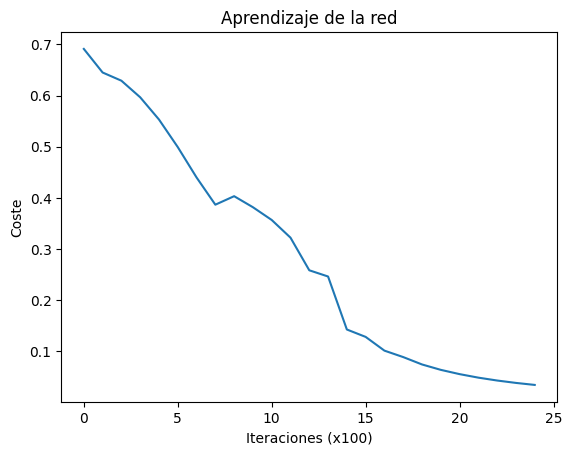


--- RESULTADOS FINALES ---
Precisión en entrenamiento: 100.00%
Precisión en prueba (Test): 70.00%


In [64]:
layers_dims = [12288, 7, 1]

# Entrenar el modelo
# Usamos los datos cargados en el Punto 1 (train_x, train_set_y)
trained_network = model(train_x, train_set_y, layers_dims, learning_rate=0.0075, num_iterations=2500)

def predict(X, network):
    """Función auxiliar para usar la red ya entrenada"""
    AL = forward_pass(X, network)
    predictions = (AL > 0.5) # Si es > 0.5 es un gato (True/1)
    return predictions

# Precisión en el set de entrenamiento
print("\n--- RESULTADOS FINALES ---")
predictions_train = predict(train_x, trained_network)
accuracy_train = np.mean(predictions_train == train_set_y) * 100
print(f"Precisión en entrenamiento: {accuracy_train:.2f}%")

# Precisión en el set de prueba (Datos que la red nunca vio)
predictions_test = predict(test_x, trained_network)
accuracy_test = np.mean(predictions_test == test_set_y) * 100
print(f"Precisión en prueba (Test): {accuracy_test:.2f}%")

Muestreo de predicciones en el set de Prueba (Test):


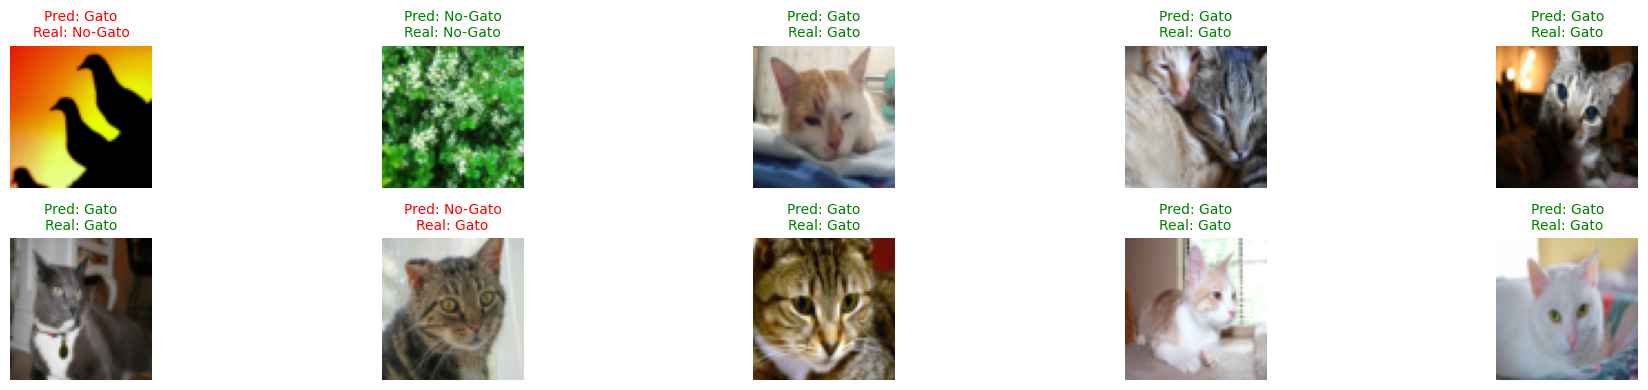

In [66]:
def visualizar_predicciones(X_orig, X_flat, Y, network, num_imagenes=10):
    # Escogemos índices al azar
    indices = np.random.choice(X_orig.shape[0], num_imagenes, replace=False)

    plt.figure(figsize=(20, 4))

    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)

        # Hacemos la predicción individual
        X_sample = X_flat[:, idx].reshape(-1, 1)
        prediccion = predict(X_sample, network)[0,0]
        real = Y[0, idx]

        # Definimos color: Verde si acertó, Rojo si falló
        color = "green" if prediccion == real else "red"
        label_pred = "Gato" if prediccion else "No-Gato"
        label_real = "Gato" if real else "No-Gato"

        plt.imshow(X_orig[idx])
        plt.axis('off')
        plt.title(f"Pred: {label_pred}\nReal: {label_real}", color=color, fontsize=10)

    plt.tight_layout()
    plt.show()

print("Muestreo de predicciones en el set de Prueba (Test):")
visualizar_predicciones(test_x_orig, test_x, test_set_y, trained_network)

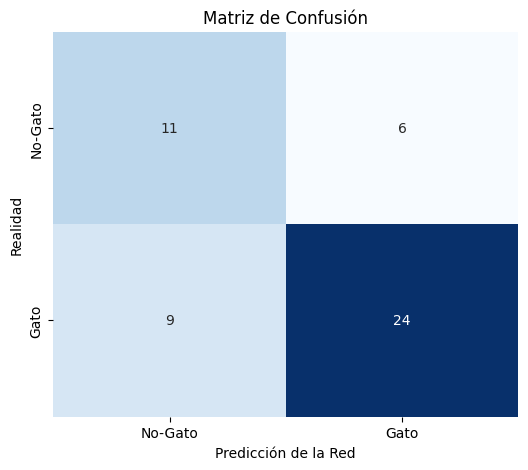

In [67]:
# Predicciones del set de prueba
predicciones_test = predict(test_x, trained_network)
y_pred = predicciones_test.astype(int).flatten()
y_true = test_set_y.flatten()

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No-Gato", "Gato"],
            yticklabels=["No-Gato", "Gato"])

plt.xlabel('Predicción de la Red')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()